## **Cleaning Data and Preprocessing**

### **Learning objectives**
- Be able to preprocess data for machine learning:
    - handling with NANs;
    - handling with categorical data;
     selecting features;
    - removin features that have too strong correlation;
    - preparing final dataset for ML.


## Data Description
- Price - Property price
- Locality - Postal code of the commune in Belgium
- Type_of_Property - House and Apartment
- Subtype_of_Property - Different kinds of Properties 
- State_of_the_Building 
- Number_of_Rooms
- Living_Area - square of living area
- Fully_Equipped_Kitchen - Yes/No
- Terrace - Yes/No
- Garden - Yes/No
- Surface_area_plot_of_land -square of the land around the Property if it is a House
- Number_of_Facades - numiracal data
- Swimming_Pool - Yes/No
- Lift - Yes/No
- Municipality - names of all Communes
- Province - names of Belgium Provinces

## Exploratory Data Analysis (EDA)
**Questions:**
- how much data do we have?
- what is our goal? What is the task? (Classification or regression)
- missing data?
- what are the statistics of the distribution of feature values? Are there BIOS outliers (anomalies)
- which features correlate with each other (correlate with each other, influence each other)? Which features influence the Target?
- for task classification: how many classes do we have - two or more? Balanced classes?
- etc.

**Depending on the form of presentation of the results, RAD can be divided into:**
- numerical or tabular analysis
- visual (graphic) analysis

**Depending on some simultaneously studied features, RAD can be divided into:**
- univariate analysis (unifactorial analysis) - study of each feature separately
- bivariate analysis - study of the mutual influence of features and comparison of their characteristics
- multivariate analysis - comparison of the statistical characteristics of several features

In [72]:
# Import necessary libraries for Data Processing
# Import necessary modules and libraries for Data Processing
# Data loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv("../data/immoweb_data_cleaned.csv")

# Display the first few rows
df.head(5)

,Price,Locality,Type_of_Property,Subtype_of_Property,State_of_the_Building,Number_of_Rooms,Living_Area,Fully_Equipped_Kitchen,Terrace,Garden,Surface_area_plot_of_land,Number_of_Facades,Swimming_Pool,Lift,Municipality,Province
0,685000,1180,APARTMENT,PENTHOUSE,JUST_RENOVATED,2,127.0,0,1.0,0.0,0.0,4.0,0.0,1.0,Uccle,Brussels Capital
1,289000,8680,APARTMENT,APARTMENT,JUST_RENOVATED,3,120.0,0,1.0,0.0,0.0,2.0,0.0,1.0,Koekelare,Other
2,259000,5030,HOUSE,HOUSE,GOOD,3,154.0,0,0.0,1.0,200.0,3.0,0.0,0.0,Gembloux,Namur
3,429210,9052,APARTMENT,APARTMENT,GOOD,2,100.0,1,1.0,0.0,0.0,3.0,0.0,1.0,Gent,East Flanders
4,314000,1770,APARTMENT,APARTMENT,GOOD,2,96.0,1,1.0,0.0,0.0,4.0,0.0,1.0,Liedekerke,Flemish Brabant


In [71]:
# how much raws and columns do we have in our dataset
df.shape

(16631, 16)

In [6]:
# What types of data do we have
df.dtypes

Price                          int64
Locality                       int64
Type_of_Property              object
Subtype_of_Property           object
State_of_the_Building         object
Number_of_Rooms                int64
Living_Area                  float64
Fully_Equipped_Kitchen         int64
Terrace                      float64
Garden                       float64
Surface_area_plot_of_land    float64
Number_of_Facades            float64
Swimming_Pool                float64
Lift                         float64
Municipality                  object
Province                      object
dtype: object

I want to change categorical data (municipality and province) to numeric (Brussels Capital -1, Flanders -2, Wallonia -3). To do this, I add a new dataset (zip.csv), clean this dataset and merge it with the main dataset.

In [7]:
# Import necessary libraries
import pandas as pd

# Load the dataset
zips = pd.read_csv("../data/zips.csv", index_col=False)

# Display the first few rows
zips.head()

,Locality,Region_Code
0,5571,3000.0
1,5080,3000.0
2,5543,3000.0
3,3581,2000.0
4,3583,2000.0


In [10]:
# Delete duplicates
zips["Region_Code"] = zips["Region_Code"].fillna(0).astype(int)

In [11]:
# Convert 'Region_Code' from float to int, handling NaN values
zips["Region_Code"] = (
    zips["Region_Code"].replace({1000: 1, 2000: 2, 3000: 3}).fillna(0).astype(int)
)

In [12]:
zips.head(5)

,Locality,Region_Code
0,5571,3
1,5080,3
2,5543,3
3,3581,2
4,3583,2


In [14]:
# Checking nulls in dataset
zips.isnull().sum()

Locality       0
Region_Code    0
dtype: int64

In [15]:
# Name and count unique State_of_the_Building
unique_region_code = zips["Region_Code"].nunique()

# Name and count unique State_of_the_Building
frequency_region_code = zips["Region_Code"].value_counts()

print(unique_region_code)
print(frequency_region_code)

4
Region_Code
3    643
2    538
1     48
0      2
Name: count, dtype: int64


In [16]:
zips["Region_Code"] = zips["Region_Code"].fillna(0).astype(int)

In [17]:
zips

,Locality,Region_Code
0,5571,3
1,5080,3
2,5543,3
3,3581,2
4,3583,2
...,...,...
1226,6704,3
1227,6740,3
1228,3400,2
1229,1800,2


In [18]:
# merging two datasets
# using merge function by setting how='inner'
ds_new = pd.merge(df, zips, on="Locality", how="inner")
ds_new.head(5)

,Price,Locality,Type_of_Property,Subtype_of_Property,State_of_the_Building,Number_of_Rooms,Living_Area,Fully_Equipped_Kitchen,Terrace,Garden,Surface_area_plot_of_land,Number_of_Facades,Swimming_Pool,Lift,Municipality,Province,Region_Code
0,685000,1180,APARTMENT,PENTHOUSE,JUST_RENOVATED,2,127.0,0,1.0,0.0,0.0,4.0,0.0,1.0,Uccle,Brussels Capital,1
1,289000,8680,APARTMENT,APARTMENT,JUST_RENOVATED,3,120.0,0,1.0,0.0,0.0,2.0,0.0,1.0,Koekelare,Other,2
2,259000,5030,HOUSE,HOUSE,GOOD,3,154.0,0,0.0,1.0,200.0,3.0,0.0,0.0,Gembloux,Namur,3
3,429210,9052,APARTMENT,APARTMENT,GOOD,2,100.0,1,1.0,0.0,0.0,3.0,0.0,1.0,Gent,East Flanders,2
4,314000,1770,APARTMENT,APARTMENT,GOOD,2,96.0,1,1.0,0.0,0.0,4.0,0.0,1.0,Liedekerke,Flemish Brabant,2


In [19]:
ds_new.shape

(18572, 17)

In [88]:
# ds_new.duplicated().sum()

In [26]:
# ds_zips = ds_new.drop_duplicates()
# ds_new.duplicated().sum()

In [20]:
ds_zips = ds_new

In [21]:
# Name and count unique State_of_the_Building
unique_region_code = ds_zips["Region_Code"].nunique()

# Name and count unique State_of_the_Building
frequency_region_code = ds_zips["Region_Code"].value_counts()

print(unique_region_code)
print(frequency_region_code)

3
Region_Code
2    11038
3     3859
1     3675
Name: count, dtype: int64


In [22]:
ds_zips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18572 entries, 0 to 18571
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Price                      18572 non-null  int64  
 1   Locality                   18572 non-null  int64  
 2   Type_of_Property           18572 non-null  object 
 3   Subtype_of_Property        18572 non-null  object 
 4   State_of_the_Building      18572 non-null  object 
 5   Number_of_Rooms            18572 non-null  int64  
 6   Living_Area                18572 non-null  float64
 7   Fully_Equipped_Kitchen     18572 non-null  int64  
 8   Terrace                    18572 non-null  float64
 9   Garden                     18572 non-null  float64
 10  Surface_area_plot_of_land  18572 non-null  float64
 11  Number_of_Facades          18572 non-null  float64
 12  Swimming_Pool              18572 non-null  float64
 13  Lift                       18572 non-null  flo

In [23]:
# Name and count unique State_of_the_Building
unique_province = ds_zips["Region_Code"].nunique()

# Name and count unique State_of_the_Building
frequency_province = ds_zips["Region_Code"].value_counts()

print(unique_province)
print(frequency_province)

3
Region_Code
2    11038
3     3859
1     3675
Name: count, dtype: int64


In [24]:
ds_zips.head(3)

,Price,Locality,Type_of_Property,Subtype_of_Property,State_of_the_Building,Number_of_Rooms,Living_Area,Fully_Equipped_Kitchen,Terrace,Garden,Surface_area_plot_of_land,Number_of_Facades,Swimming_Pool,Lift,Municipality,Province,Region_Code
0,685000,1180,APARTMENT,PENTHOUSE,JUST_RENOVATED,2,127.0,0,1.0,0.0,0.0,4.0,0.0,1.0,Uccle,Brussels Capital,1
1,289000,8680,APARTMENT,APARTMENT,JUST_RENOVATED,3,120.0,0,1.0,0.0,0.0,2.0,0.0,1.0,Koekelare,Other,2
2,259000,5030,HOUSE,HOUSE,GOOD,3,154.0,0,0.0,1.0,200.0,3.0,0.0,0.0,Gembloux,Namur,3


In [25]:
# Changing categorical value into numerical in Type_of_Property (House - 0, Apartment - 1)
ds_zips["Type_of_Property"].replace("HOUSE", 0, inplace=True)
ds_zips["Type_of_Property"].replace("APARTMENT", 1, inplace=True)

C:\Users\fomic\AppData\Local\Temp\ipykernel_5124\483401574.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds_zips["Type_of_Property"].replace("HOUSE", 0, inplace=True)
C:\Users\fomic\AppData\Local\Temp\ipykernel_5124\483401574.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [26]:
ds_zips.head(5)

,Price,Locality,Type_of_Property,Subtype_of_Property,State_of_the_Building,Number_of_Rooms,Living_Area,Fully_Equipped_Kitchen,Terrace,Garden,Surface_area_plot_of_land,Number_of_Facades,Swimming_Pool,Lift,Municipality,Province,Region_Code
0,685000,1180,1,PENTHOUSE,JUST_RENOVATED,2,127.0,0,1.0,0.0,0.0,4.0,0.0,1.0,Uccle,Brussels Capital,1
1,289000,8680,1,APARTMENT,JUST_RENOVATED,3,120.0,0,1.0,0.0,0.0,2.0,0.0,1.0,Koekelare,Other,2
2,259000,5030,0,HOUSE,GOOD,3,154.0,0,0.0,1.0,200.0,3.0,0.0,0.0,Gembloux,Namur,3
3,429210,9052,1,APARTMENT,GOOD,2,100.0,1,1.0,0.0,0.0,3.0,0.0,1.0,Gent,East Flanders,2
4,314000,1770,1,APARTMENT,GOOD,2,96.0,1,1.0,0.0,0.0,4.0,0.0,1.0,Liedekerke,Flemish Brabant,2


In [27]:
ds_zips.shape

(18572, 17)

In [28]:
# We use the following command to check for missing values:
ds_zips.isnull().sum()

Price                        0
Locality                     0
Type_of_Property             0
Subtype_of_Property          0
State_of_the_Building        0
Number_of_Rooms              0
Living_Area                  0
Fully_Equipped_Kitchen       0
Terrace                      0
Garden                       0
Surface_area_plot_of_land    0
Number_of_Facades            0
Swimming_Pool                0
Lift                         0
Municipality                 0
Province                     0
Region_Code                  0
dtype: int64

In [29]:
# Name and count unique State_of_the_Building
unique_state = ds_zips["State_of_the_Building"].nunique()

# Name and count unique State_of_the_Building
frequency_state = ds_zips["State_of_the_Building"].value_counts()

print(unique_state)
print(frequency_state)

6
State_of_the_Building
GOOD              10032
AS_NEW             4338
TO_RENOVATE        1516
TO_BE_DONE_UP      1388
JUST_RENOVATED     1230
TO_RESTORE           68
Name: count, dtype: int64


In [30]:
# generate bianry (fake varaibales) for State_of_the_Building
state_building = pd.get_dummies(ds_zips["State_of_the_Building"], dtype=int)
state_building.head()

,AS_NEW,GOOD,JUST_RENOVATED,TO_BE_DONE_UP,TO_RENOVATE,TO_RESTORE
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [31]:
# Name and count unique State_of_the_Building
unique_subtype = ds_zips["Subtype_of_Property"].nunique()

# Name and count unique State_of_the_Building
frequency_subtype = ds_zips["Subtype_of_Property"].value_counts()

print(unique_subtype)
print(frequency_subtype)

22
Subtype_of_Property
APARTMENT               8843
HOUSE                   6453
GROUND_FLOOR             601
DUPLEX                   598
PENTHOUSE                452
MIXED_USE_BUILDING       275
VILLA                    234
APARTMENT_BLOCK          228
FLAT_STUDIO              183
TOWN_HOUSE               149
SERVICE_FLAT             141
LOFT                      94
TRIPLEX                   73
BUNGALOW                  70
KOT                       59
MANSION                   51
EXCEPTIONAL_PROPERTY      24
COUNTRY_COTTAGE           22
CHALET                    13
FARMHOUSE                  5
OTHER_PROPERTY             3
MANOR_HOUSE                1
Name: count, dtype: int64


In [32]:
# generate bianry (fake varaibales) for State_of_the_Building
subtypes_of_property = pd.get_dummies(ds_zips["Subtype_of_Property"], dtype=int)
subtypes_of_property.head()

,APARTMENT,APARTMENT_BLOCK,BUNGALOW,CHALET,COUNTRY_COTTAGE,DUPLEX,EXCEPTIONAL_PROPERTY,FARMHOUSE,FLAT_STUDIO,GROUND_FLOOR,...,LOFT,MANOR_HOUSE,MANSION,MIXED_USE_BUILDING,OTHER_PROPERTY,PENTHOUSE,SERVICE_FLAT,TOWN_HOUSE,TRIPLEX,VILLA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
ds_zips.columns

Index(['Price', 'Locality', 'Type_of_Property', 'Subtype_of_Property',
       'State_of_the_Building', 'Number_of_Rooms', 'Living_Area',
       'Fully_Equipped_Kitchen', 'Terrace', 'Garden',
       'Surface_area_plot_of_land', 'Number_of_Facades', 'Swimming_Pool',
       'Lift', 'Municipality', 'Province', 'Region_Code'],
      dtype='object')

In [34]:
ds_zips.head(1)

,Price,Locality,Type_of_Property,Subtype_of_Property,State_of_the_Building,Number_of_Rooms,Living_Area,Fully_Equipped_Kitchen,Terrace,Garden,Surface_area_plot_of_land,Number_of_Facades,Swimming_Pool,Lift,Municipality,Province,Region_Code
0,685000,1180,1,PENTHOUSE,JUST_RENOVATED,2,127.0,0,1.0,0.0,0.0,4.0,0.0,1.0,Uccle,Brussels Capital,1


In [35]:
# list of features_names, which will be used for the building Model
features_names = [
    "Price",
    "Type_of_Property",
    "Number_of_Rooms",
    "Living_Area",
    "Fully_Equipped_Kitchen",
    "Terrace",
    "Garden",
    "Surface_area_plot_of_land",
    "Number_of_Facades",
    "Swimming_Pool",
    "Lift",
    "Region_Code",
]

In [36]:
# Contatinate State_of_the_Building as a binary to ds and craete Objects-fetures
X = pd.concat([ds_zips[features_names], state_building, subtypes_of_property], axis=1)
X.shape

(18572, 40)

In [37]:
X.head()

,Price,Type_of_Property,Number_of_Rooms,Living_Area,Fully_Equipped_Kitchen,Terrace,Garden,Surface_area_plot_of_land,Number_of_Facades,Swimming_Pool,...,LOFT,MANOR_HOUSE,MANSION,MIXED_USE_BUILDING,OTHER_PROPERTY,PENTHOUSE,SERVICE_FLAT,TOWN_HOUSE,TRIPLEX,VILLA
0,685000,1,2,127.0,0,1.0,0.0,0.0,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,289000,1,3,120.0,0,1.0,0.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,259000,0,3,154.0,0,0.0,1.0,200.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,429210,1,2,100.0,1,1.0,0.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,314000,1,2,96.0,1,1.0,0.0,0.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X.duplicated().sum()

np.int64(3017)

In [39]:
X = X.drop_duplicates()

In [40]:
X.shape

(15555, 40)

In [64]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,15555.0,329968.310833,150033.959396,5000.0,225000.0,299000.0,399000.0,880000.0
Type_of_Property,15555.0,0.568885,0.495248,0.0,0.0,1.0,1.0,1.0
Number_of_Rooms,15555.0,2.448730,0.884912,1.0,2.0,2.0,3.0,4.0
Living_Area,15555.0,124.040694,51.491192,12.0,85.0,114.0,156.0,294.0
Fully_Equipped_Kitchen,15555.0,0.175378,0.380302,0.0,0.0,0.0,0.0,1.0
Terrace,15555.0,0.681389,0.465953,0.0,0.0,1.0,1.0,1.0
Garden,15555.0,0.200129,0.400109,0.0,0.0,0.0,0.0,1.0
Surface_area_plot_of_land,15555.0,121.590614,193.419342,0.0,0.0,0.0,195.0,777.0
Number_of_Facades,15555.0,2.446062,0.671632,1.0,2.0,2.0,3.0,5.0
Swimming_Pool,15555.0,0.006815,0.082271,0.0,0.0,0.0,0.0,1.0


In [66]:
# Save the DataFrame to a CSV file without the index column
X.to_csv("../data/immoweb_data_processed.csv", index=False)

### Univariate analysis - study of each feature separately

In [67]:
df = pd.read_csv("../data/immoweb_data_processed.csv")

In [68]:
df.head()

,Price,Type_of_Property,Number_of_Rooms,Living_Area,Fully_Equipped_Kitchen,Terrace,Garden,Surface_area_plot_of_land,Number_of_Facades,Swimming_Pool,...,LOFT,MANOR_HOUSE,MANSION,MIXED_USE_BUILDING,OTHER_PROPERTY,PENTHOUSE,SERVICE_FLAT,TOWN_HOUSE,TRIPLEX,VILLA
0,685000,1,2,127.0,0,1.0,0.0,0.0,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,289000,1,3,120.0,0,1.0,0.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,259000,0,3,154.0,0,0.0,1.0,200.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,429210,1,2,100.0,1,1.0,0.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,314000,1,2,96.0,1,1.0,0.0,0.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df.shape

(15555, 40)

<Axes: xlabel='Type_of_Property'>

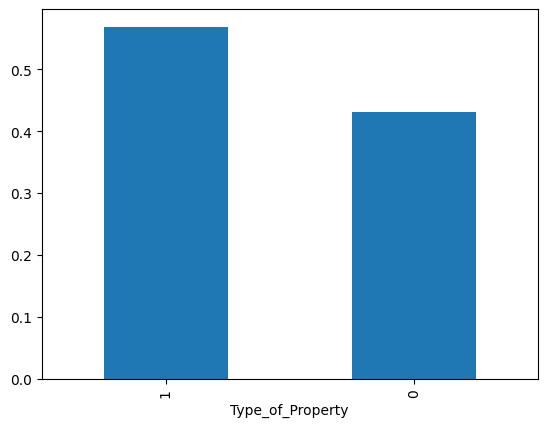

In [45]:
# Visualisation numbers of Type_of_Property
df["Type_of_Property"].value_counts(normalize=True).plot.bar()

<Axes: xlabel='Number_of_Rooms'>

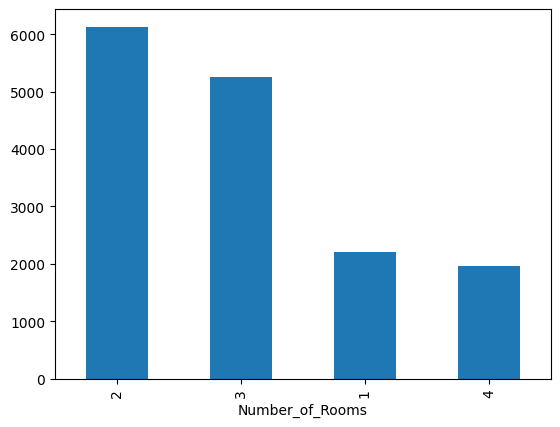

In [46]:
# Visualisation numbers of Subtype_of_Property
df["Number_of_Rooms"].value_counts(normalize=False).plot.bar()

<Axes: ylabel='count'>

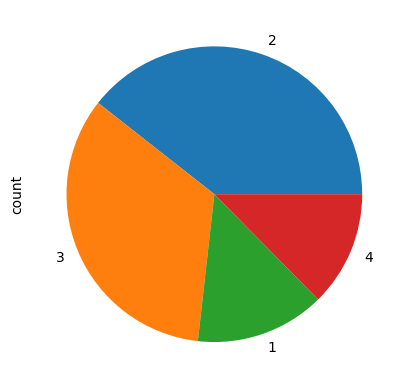

In [47]:
# Visualisation numbers of Number_of_Rooms
df["Number_of_Rooms"].value_counts(normalize=False).plot.pie()

<Axes: xlabel='Fully_Equipped_Kitchen'>

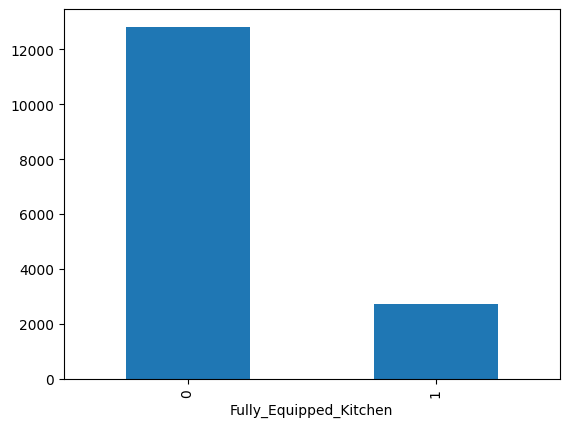

In [48]:
# Visualisation numbers of Fully_Equipped_Kitchen
df["Fully_Equipped_Kitchen"].value_counts(normalize=False).plot.bar()

<Axes: xlabel='Terrace'>

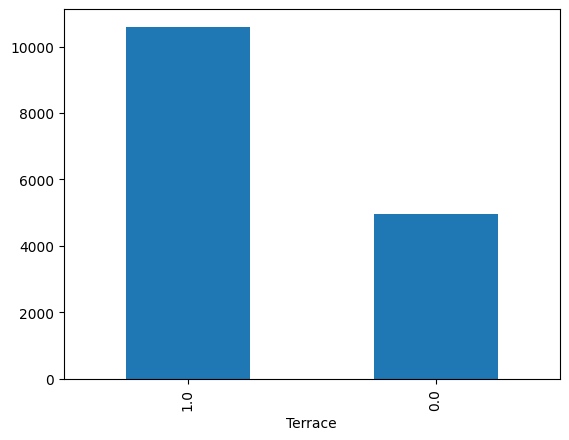

In [49]:
# Visualisation numbers of Terrace
df["Terrace"].value_counts(normalize=False).plot.bar()

<Axes: xlabel='Region_Code'>

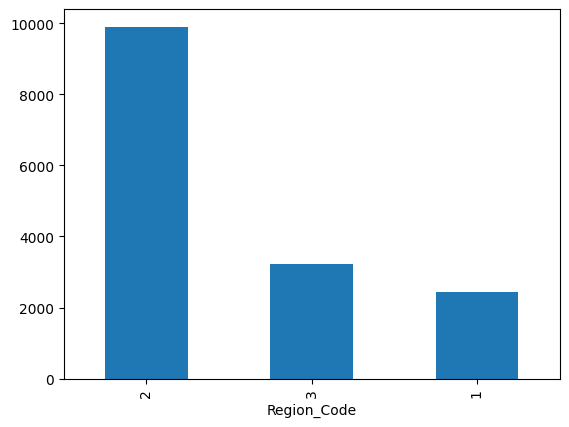

In [50]:
# Visualisation numbers of Province
df["Region_Code"].value_counts(normalize=False).plot.bar()

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Type_of_Property'}>,
        <Axes: title={'center': 'Number_of_Rooms'}>,
        <Axes: title={'center': 'Living_Area'}>,
        <Axes: title={'center': 'Fully_Equipped_Kitchen'}>,
        <Axes: title={'center': 'Terrace'}>],
       [<Axes: title={'center': 'Garden'}>,
        <Axes: title={'center': 'Surface_area_plot_of_land'}>,
        <Axes: title={'center': 'Number_of_Facades'}>,
        <Axes: title={'center': 'Swimming_Pool'}>,
        <Axes: title={'center': 'Lift'}>,
        <Axes: title={'center': 'Region_Code'}>],
       [<Axes: title={'center': 'AS_NEW'}>,
        <Axes: title={'center': 'GOOD'}>,
        <Axes: title={'center': 'JUST_RENOVATED'}>,
        <Axes: title={'center': 'TO_BE_DONE_UP'}>,
        <Axes: title={'center': 'TO_RENOVATE'}>,
        <Axes: title={'center': 'TO_RESTORE'}>],
       [<Axes: title={'center': 'APARTMENT'}>,
        <Axes: title={'center': 'APARTMENT_BLOCK'}>,
   

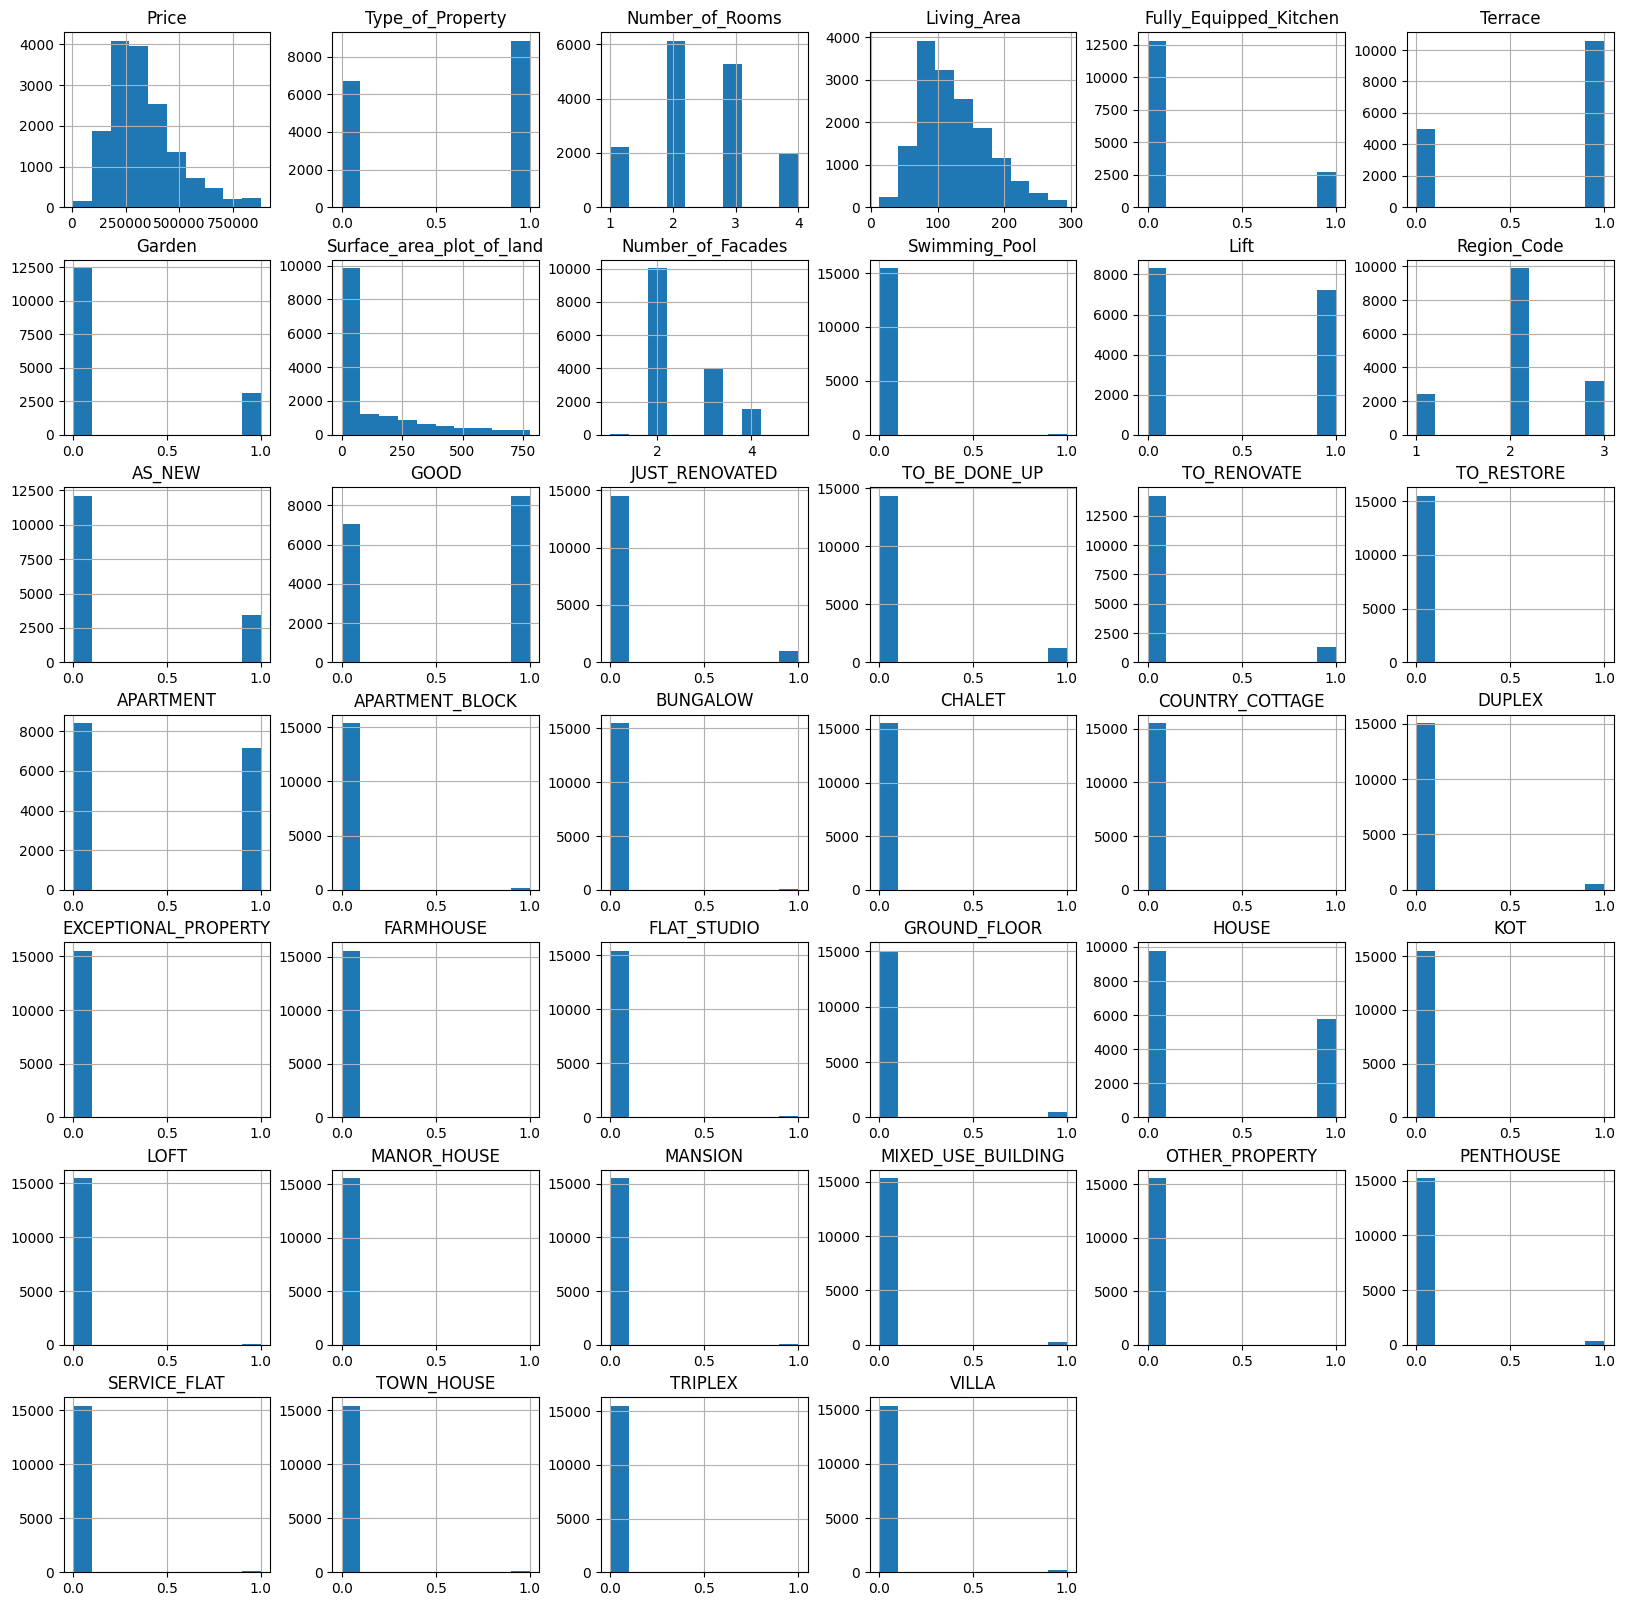

In [51]:
# histogramma for all features
df.hist(figsize=(20, 20))

<Axes: >

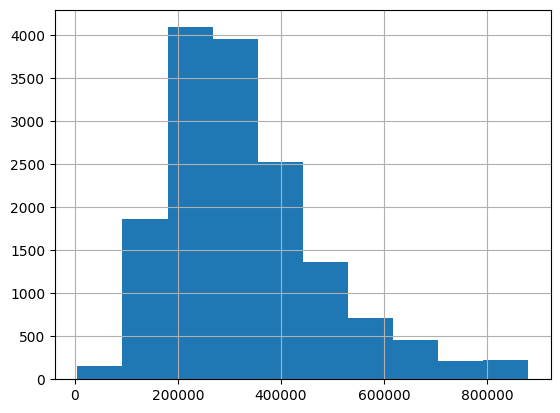

In [52]:
# histogramma for one value
df["Price"].hist()

<Axes: >

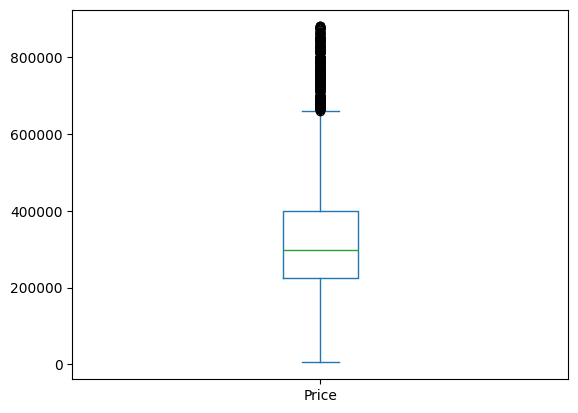

In [53]:
# boxplot for  visualization of the probability distribution of the feature value
df["Price"].plot.box()

<Axes: ylabel='Density'>

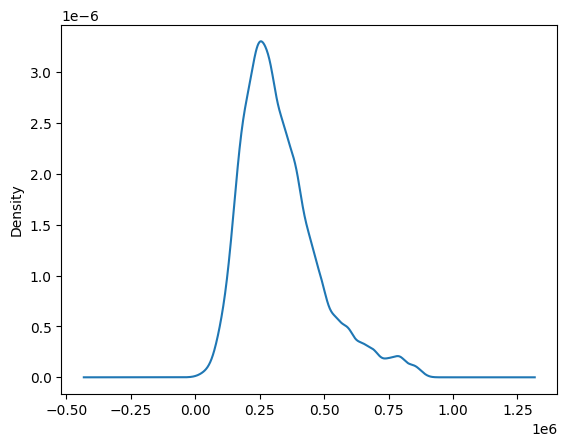

In [65]:
df["Price"].plot.density()

### - bivariate analysis - study of the mutual influence of features and comparison of their characteristics


In [54]:
# list of features_names, which will be used for the building Model
features_eda = [
    "Price",
    "Type_of_Property",
    "Number_of_Rooms",
    "Living_Area",
    "Fully_Equipped_Kitchen",
    "Terrace",
    "Garden",
    "Surface_area_plot_of_land",
    "Number_of_Facades",
    "Swimming_Pool",
    "Lift",
    "Region_Code",
]

In [55]:
# Contatinate State_of_the_Building as a binary to ds and craete Objects-fetures
features_names = pd.concat([df[features_eda]], axis=1)
features_names.shape

(15555, 12)

In [56]:
# matrix of correlation
corr = features_names.corr()
corr

,Price,Type_of_Property,Number_of_Rooms,Living_Area,Fully_Equipped_Kitchen,Terrace,Garden,Surface_area_plot_of_land,Number_of_Facades,Swimming_Pool,Lift,Region_Code
Price,1.000000,-0.025793,0.327378,0.433501,0.287574,0.156315,0.039679,0.102217,0.080395,0.036304,0.016442,-0.309948
Type_of_Property,-0.025793,1.000000,-0.570642,-0.596723,0.108579,0.121025,-0.374403,-0.722153,-0.367479,-0.011522,0.800546,-0.292588
Number_of_Rooms,0.327378,-0.570642,1.000000,0.718805,0.004941,0.026337,0.243342,0.461847,0.243446,0.004799,-0.459171,0.131026
Living_Area,0.433501,-0.596723,0.718805,1.000000,0.035275,0.017058,0.227931,0.531552,0.279008,0.020757,-0.486109,0.087944
Fully_Equipped_Kitchen,0.287574,0.108579,0.004941,0.035275,1.000000,0.150268,0.009316,-0.056402,-0.017080,0.019336,0.088726,-0.190474
Terrace,0.156315,0.121025,0.026337,0.017058,0.150268,1.000000,0.053052,-0.060237,-0.009104,0.024776,0.153743,-0.053671
Garden,0.039679,-0.374403,0.243342,0.227931,0.009316,0.053052,1.000000,0.315758,0.121037,0.034739,-0.323859,0.171581
Surface_area_plot_of_land,0.102217,-0.722153,0.461847,0.531552,-0.056402,-0.060237,0.315758,1.000000,0.490213,0.046808,-0.580953,0.245608
Number_of_Facades,0.080395,-0.367479,0.243446,0.279008,-0.017080,-0.009104,0.121037,0.490213,1.000000,0.046213,-0.285205,0.151381
Swimming_Pool,0.036304,-0.011522,0.004799,0.020757,0.019336,0.024776,0.034739,0.046808,0.046213,1.000000,0.004204,0.019131


<Axes: >

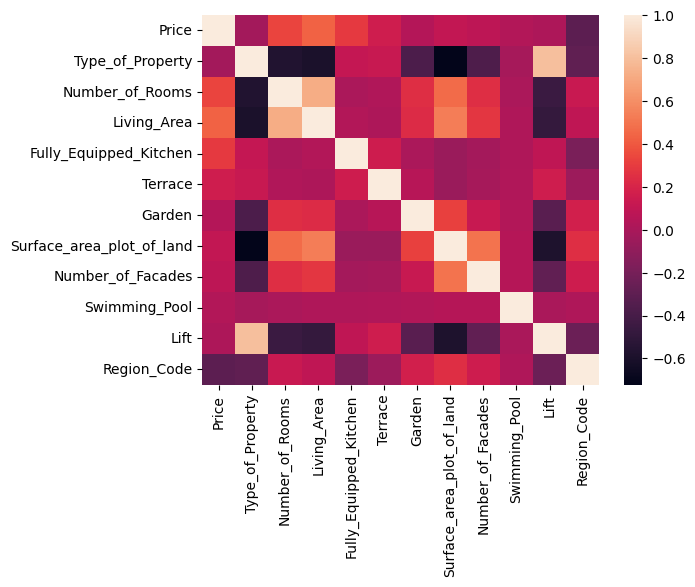

In [57]:
import seaborn as sns

# heating histogramm
sns.heatmap(corr)

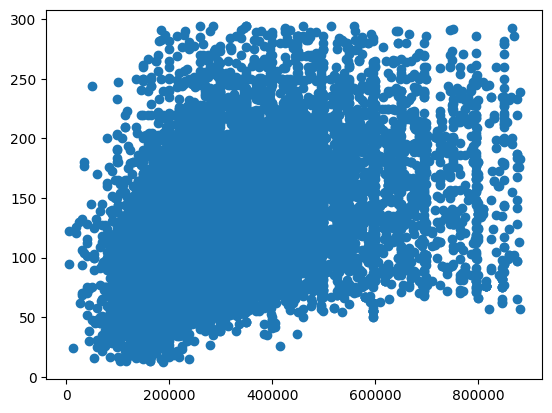

In [72]:
# bulding scatterplot for two values
plt.scatter(features_names["Price"], features_names["Living_Area"])

<Axes: xlabel='Price', ylabel='Living_Area'>

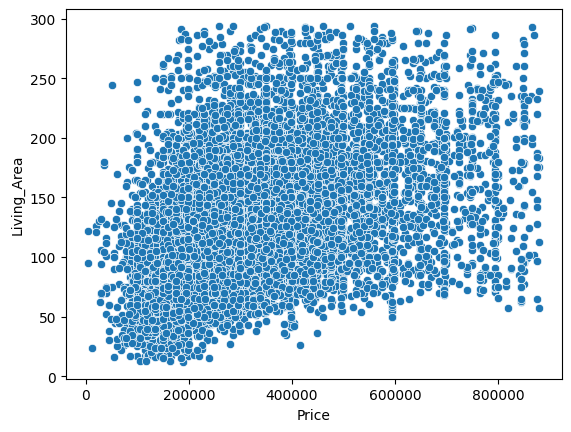

In [73]:
# bulding scatterplot for two values in seaborn
sns.scatterplot(data=features_names, x="Price", y="Living_Area")

<Axes: xlabel='Price', ylabel='Living_Area'>

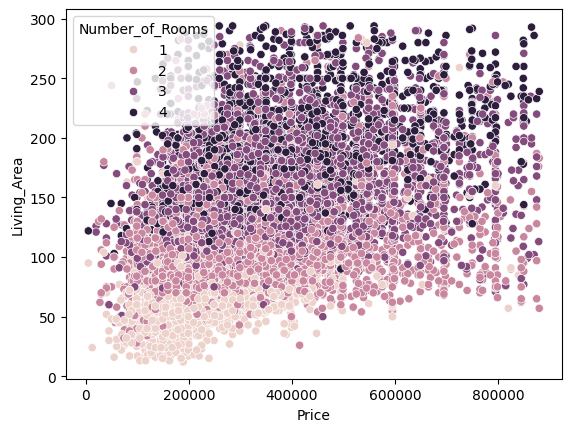

In [74]:
# bulding scatterplot for two values in colors in seaborn
sns.scatterplot(
    data=features_names, x="Price", y="Living_Area", hue="Number_of_Rooms"
)  # style='Number_of_Rooms'

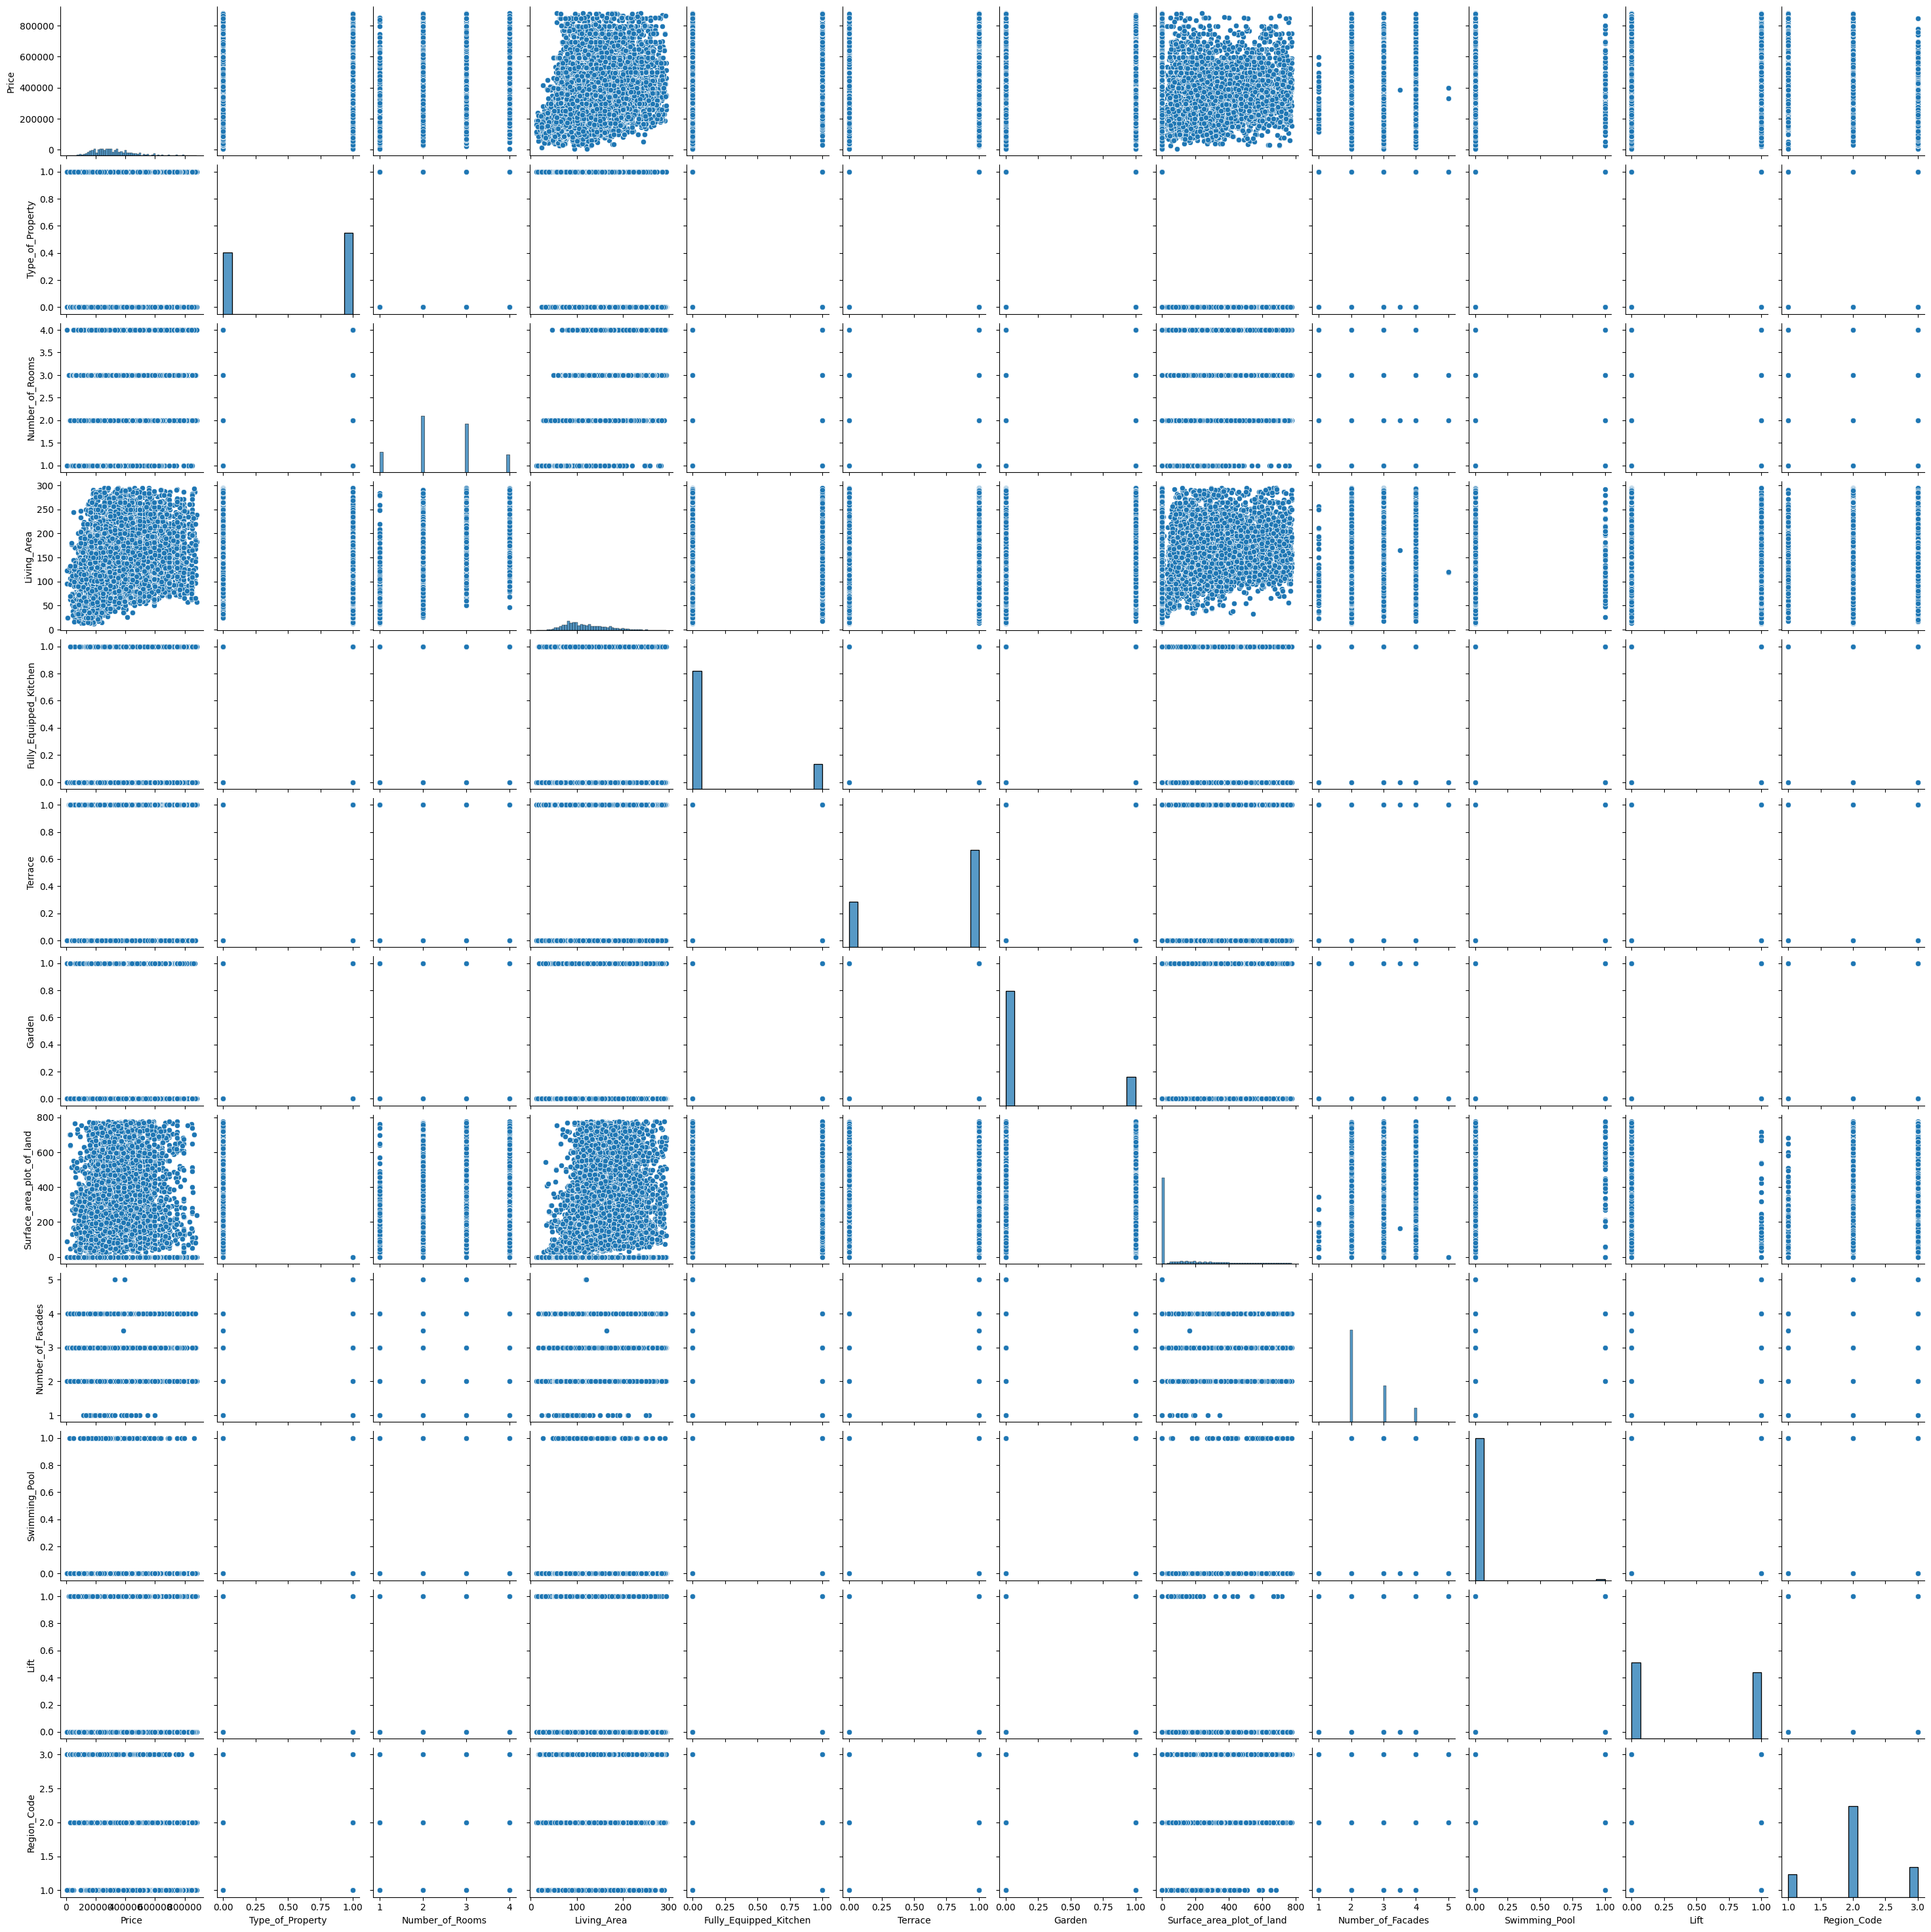

In [75]:
sns.pairplot(features_names)

<Axes: xlabel='Type_of_Property', ylabel='Living_Area'>

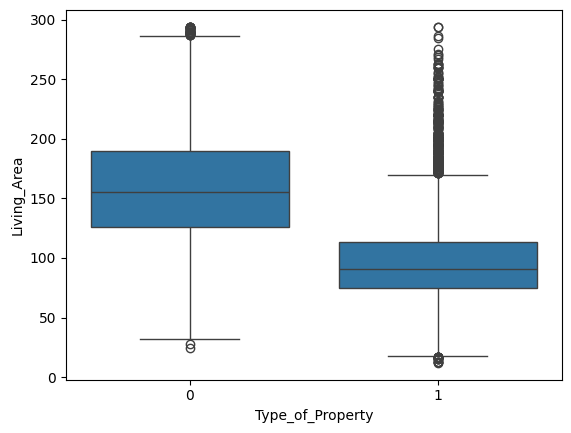

In [76]:
sns.boxplot(data=features_names, y="Living_Area", x="Type_of_Property")

<Axes: xlabel='Type_of_Property', ylabel='Living_Area'>

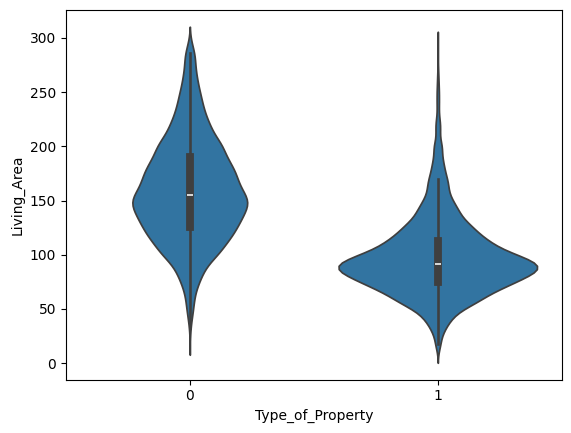

In [77]:
sns.violinplot(data=features_names, y="Living_Area", x="Type_of_Property")

<Axes: xlabel='Type_of_Property', ylabel='Number_of_Rooms'>

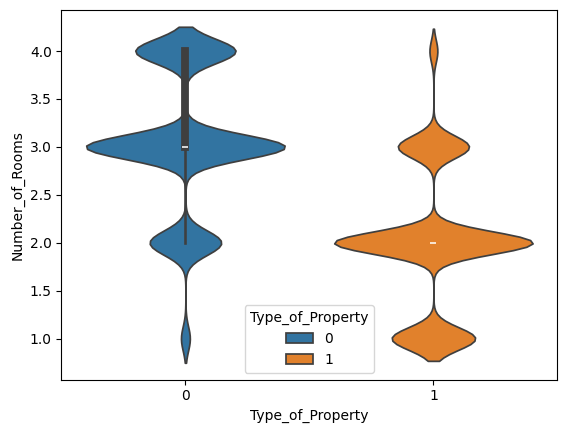

In [78]:
sns.violinplot(
    data=features_names,
    y="Number_of_Rooms",
    x="Type_of_Property",
    hue="Type_of_Property",
)

<Axes: xlabel='Type_of_Property', ylabel='Region_Code'>

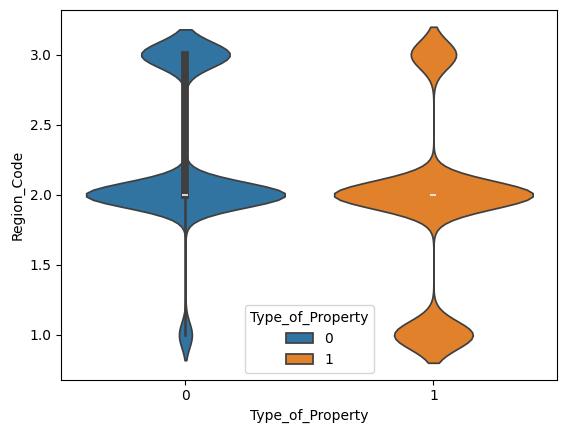

In [79]:
sns.violinplot(
    data=features_names, x="Type_of_Property", y="Region_Code", hue="Type_of_Property"
)

CONCLUSIONS:
These visualizations help us to better understand our data, find rules. We can group our data for further analysing 

In [80]:
# we can group several values for further visualisation
features_names.groupby("Type_of_Property")["Region_Code"].mean()

Type_of_Property
0    2.251864
1    1.896824
Name: Region_Code, dtype: float64

<Axes: xlabel='Type_of_Property'>

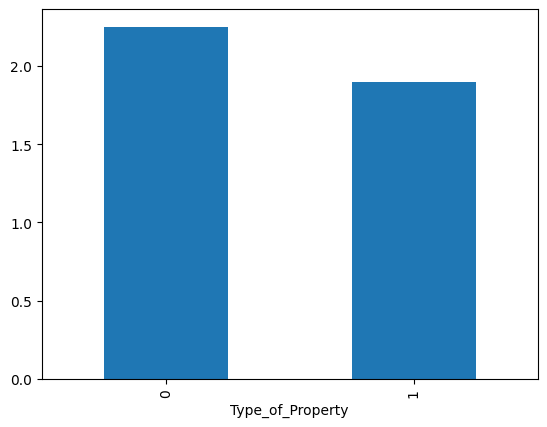

In [81]:
features_names.groupby("Type_of_Property")["Region_Code"].mean().plot.bar()

Multivariate analysis

In [58]:
# building pivot tabel for Number_of_Rooms and Regions
result = pd.pivot_table(
    data=features_names, index="Region_Code", columns="Number_of_Rooms", values="Price"
)
result

Number_of_Rooms,1,2,3,4
Region_Code,,,,
1,265152.559259,366208.696157,493551.332198,568262.319588
2,242079.916603,323624.787611,379006.769187,416350.517077
3,162045.756522,212629.481164,267686.391122,295550.833006


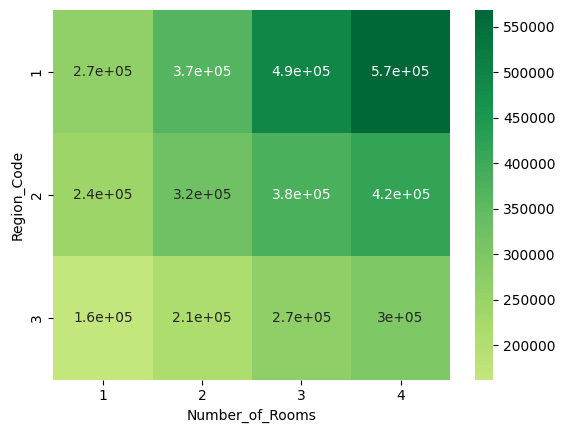

In [59]:
# building warm histograms
sns.heatmap(result, annot=True, cmap="RdYlGn", center=0.117)
plt.show()